In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import img_manip
from importlib import reload
import os

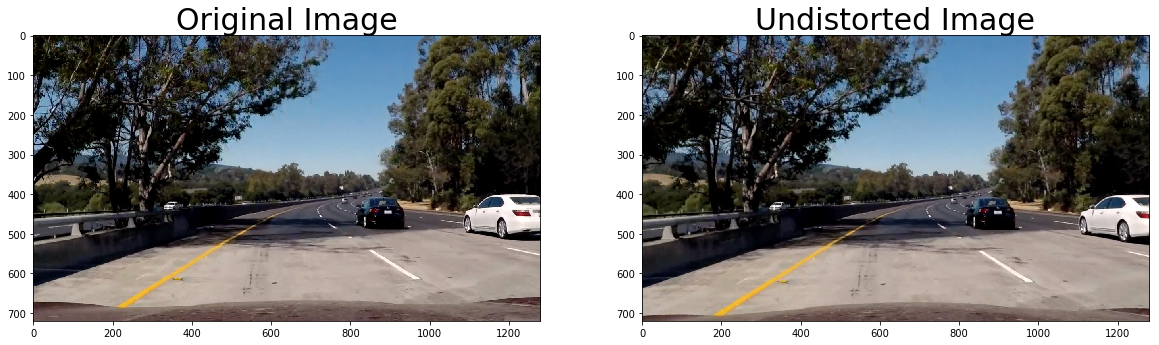

In [2]:
reload(img_manip)
image = cv2.cvtColor(cv2.imread('test_images/test5.jpg'),cv2.COLOR_BGR2RGB)
mtx, dist = img_manip.get_calibration_matrix()
dst = img_manip.undistort(image,mtx,dist)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)
plt.show()

In [ ]:
image = cv2.cvtColor(cv2.imread('test_images/test4.jpg'),cv2.COLOR_BGR2RGB)
dst = img_manip.undistort(image,mtx,dist)
warped = img_manip.warp(dst)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(dst)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(warped)
ax2.set_title('Warped Image', fontsize=30)
plt.show()

In [ ]:
reload(img_manip)
test_images = os.listdir('test_images/')
num = len(test_images)

plt.figure(figsize=(20,60))
for idx, fname in enumerate(test_images):
    image = cv2.imread('test_images/'+ fname)
    dst = img_manip.undistort(image,mtx,dist)
    
    hsv = cv2.cvtColor(dst, cv2.COLOR_BGR2HSV)
    yellow_thresh = np.zeros_like(hsv[:,:,1])
    yellow_thresh[((hsv[:,:,0] > 15) & (hsv[:,:,0] < 30)) & (hsv[:,:,1] > 100) & (hsv[:,:,2]>50)] = 1
    
    white_thresh = np.zeros_like(yellow_thresh)
    white_thresh[(hsv[:,:,1] < 30) & (hsv[:,:,2]>200)] = 1
    
    color_thresh = (white_thresh + yellow_thresh).astype(np.uint8)
    
    plt.subplot(num,2,1+2*idx)
    plt.imshow(image,cmap='gray')
    plt.title('image')
    plt.subplot(num,2,2+2*idx)
    plt.imshow(color_thresh,cmap='gray')
    plt.title('thresh')
plt.show()

In [ ]:
reload(img_manip)
test_images = os.listdir('test_images/')
num = len(test_images)

plt.figure(figsize=(20,60))
for idx, fname in enumerate(test_images):
    image = cv2.imread('test_images/'+ fname)
    dst = img_manip.undistort(image,mtx,dist)
    
    hls = cv2.cvtColor(dst, cv2.COLOR_BGR2HLS)
    gradx, gradx_thresh = img_manip.sobelx_thresh(hls[:,:,2],thresh=(30,120),ksize=9)
    
    plt.subplot(num,2,1+2*idx)
    plt.imshow(gradx,cmap='gray')
    plt.title('image')
    plt.subplot(num,2,2+2*idx)
    plt.imshow(gradx_thresh,cmap='gray')
    plt.title('thresh')
plt.show()

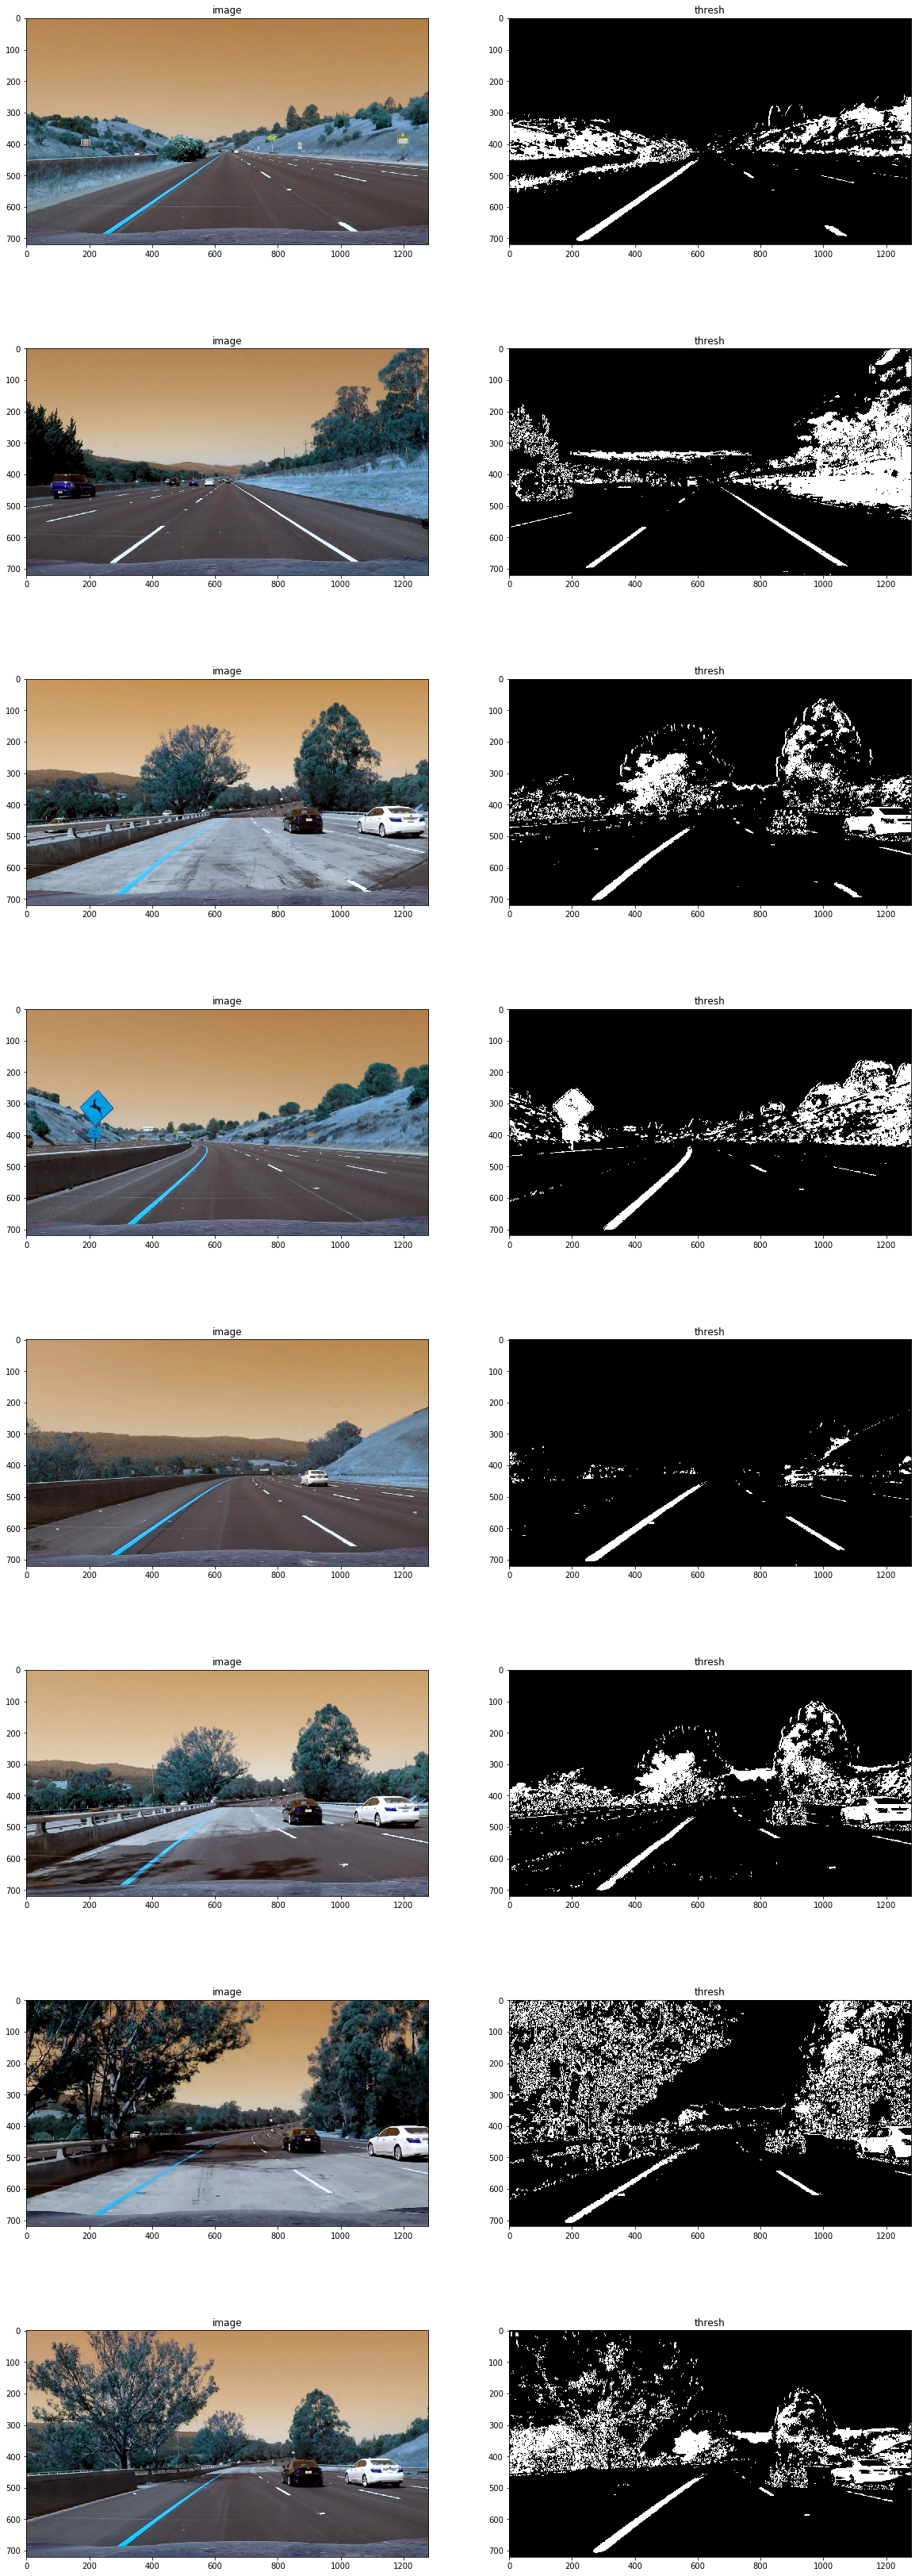

In [24]:
reload(img_manip)
test_images = os.listdir('test_images/')
binaries = []
num = len(test_images)

plt.figure(figsize=(20,60))
for idx, fname in enumerate(test_images):
    image = cv2.imread('test_images/'+ fname)
    dst = img_manip.undistort(image,mtx,dist)
    
    hsv = cv2.cvtColor(dst, cv2.COLOR_BGR2HSV)
    yellow_thresh = np.zeros_like(hsv[:,:,1])
    yellow_thresh[((hsv[:,:,0] > 15) & (hsv[:,:,0] < 30)) & (hsv[:,:,1] > 100) & (hsv[:,:,2]>50)] = 1
    
    white_thresh = np.zeros_like(yellow_thresh)
    white_thresh[(hsv[:,:,1] < 30) & (hsv[:,:,2]>200)] = 1
    
    color_thresh = (white_thresh + yellow_thresh).astype(np.uint8)
    
    hls = cv2.cvtColor(dst, cv2.COLOR_BGR2HLS)
    gradx, gradx_thresh = img_manip.sobelx_thresh(hls[:,:,2],thresh=(30,120),ksize=9)
    
    binary = np.bitwise_or(color_thresh,gradx_thresh.astype(np.uint8))
    binaries.append(binary)
    
    plt.subplot(num,2,1+2*idx)
    plt.imshow(image,cmap='gray')
    plt.title('image')
    plt.subplot(num,2,2+2*idx)
    plt.imshow(binary,cmap='gray')
    plt.title('thresh')
plt.show()

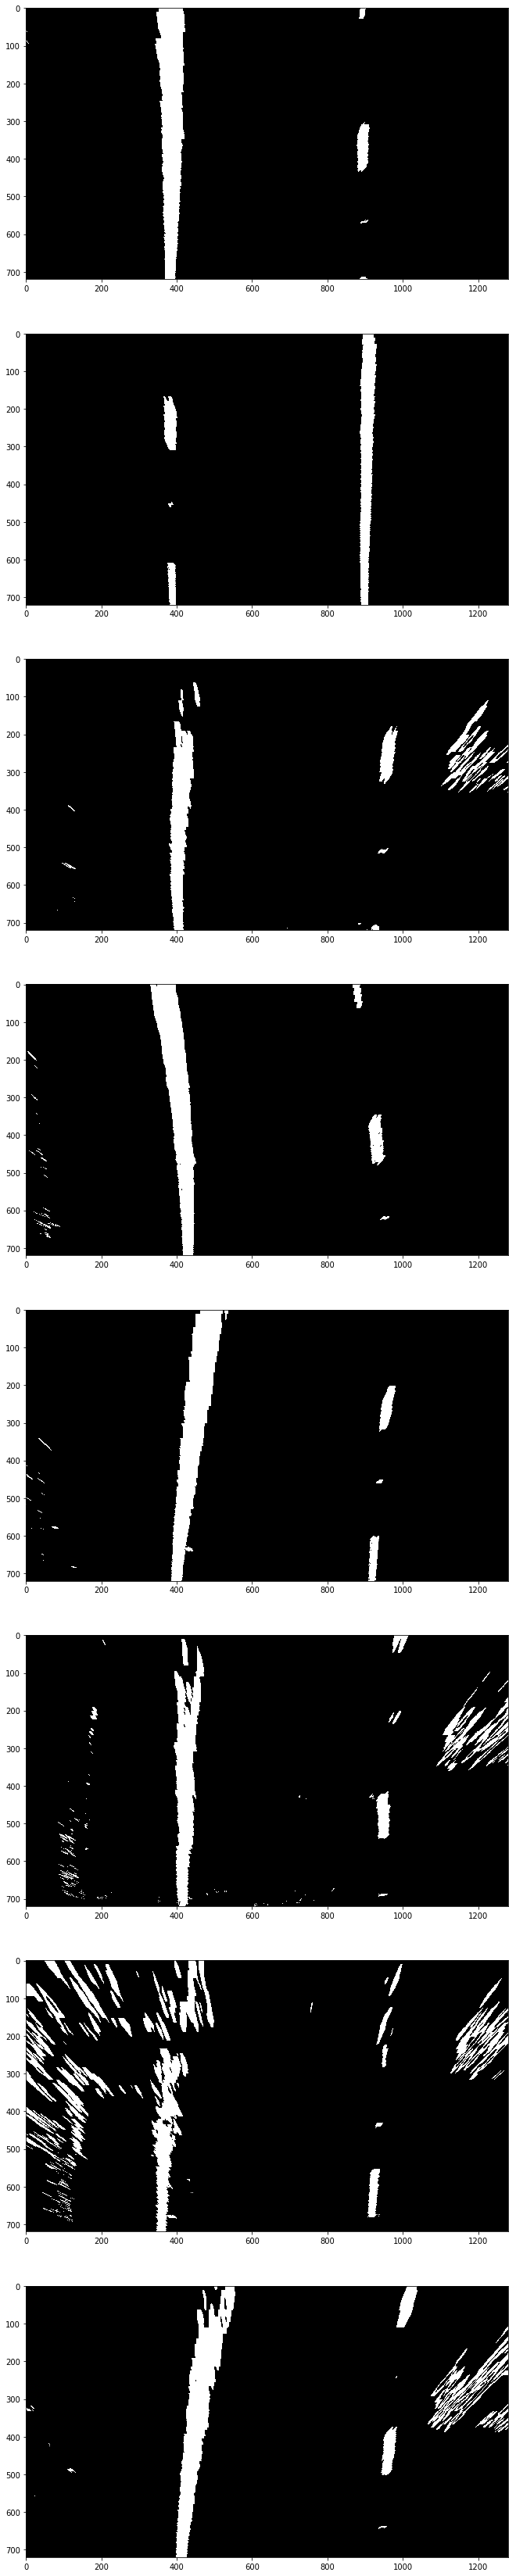

In [25]:
warps = []
num = len(test_images)

plt.figure(figsize=(20,60))
for idx,binary in enumerate(binaries):
    warped = img_manip.warp(binary)
    warps.append(warped)
    
    plt.subplot(num,1,idx+1)
    plt.imshow(warped, cmap='gray')
plt.show()

In [4]:
def get_warped_binary(image,mtx,dist):
    dst = img_manip.undistort(image,mtx,dist)
    
    hsv = cv2.cvtColor(dst, cv2.COLOR_BGR2HSV)
    yellow_thresh = np.zeros_like(hsv[:,:,1])
    yellow_thresh[((hsv[:,:,0] > 15) & (hsv[:,:,0] < 30)) & (hsv[:,:,1] > 100) & (hsv[:,:,2]>50)] = 1
    
    white_thresh = np.zeros_like(yellow_thresh)
    white_thresh[(hsv[:,:,1] < 30) & (hsv[:,:,2]>200)] = 1
    
    color_thresh = (white_thresh + yellow_thresh).astype(np.uint8)
    
    hls = cv2.cvtColor(dst, cv2.COLOR_BGR2HLS)
    gradx, gradx_thresh = img_manip.sobelx_thresh(hls[:,:,2],thresh=(30,120),ksize=9)
    
    binary = np.bitwise_or(color_thresh,gradx_thresh.astype(np.uint8))
    
    warped = img_manip.warp(binary)
    
    return warped

In [77]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [ ]:
output = 'test_videos_output/project_video.mp4'
clip1 = VideoFileClip("project_video.mp4")
white_clip = clip1.fl_image(lambda image: get_warped_binary(image,mtx,dist)) #NOTE: this function expects color images!!
%time white_clip.write_videofile(output, audio=False)
clip1.close()

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(output))

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format('project_video.mp4'))


In [73]:
def find_lane_pixels(binary_warped,nwindows=9,margin=100,minpix=50):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # Set height of windows - based on nwindows above and image shape
    window_height = np.int(binary_warped.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        
        # Identify the nonzero pixels in x and y within the window #
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    return leftx, lefty, rightx, righty, out_img


def fit_polynomial(binary_warped):
    # Find our lane pixels first
    leftx, lefty, rightx, righty, out_img = find_lane_pixels(binary_warped)

    # Fit a second order polynomial to each using `np.polyfit`
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    ## Visualization ##
    # Colors in the left and right lane regions
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 0, 255]

    return out_img, left_fitx, right_fitx, ploty

def overlay_lane(colored_lanes,leftx,rightx,y):
    left = np.array([leftx,y]).T
    right =  np.array([rightx,y]).T
    pts = np.int32(np.concatenate([left,right[::-1]]))
    
    poly = np.zeros_like(colored_lanes)
    cv2.fillConvexPoly(poly,pts,(0,255,0))
    
    out_image = cv2.addWeighted(colored_lanes,1,poly,0.5,0)
    
    return out_image

def process_image(image,mtx,dist):
    dst = img_manip.undistort(image,mtx,dist)
    binary_warped = get_warped_binary(dst,mtx,dist)
    
    colored_lanes, left_fitx, right_fitx, ploty = fit_polynomial(binary_warped)
    colored_lanes = overlay_lane(colored_lanes,left_fitx,right_fitx,ploty)
    colored_lanes_unwarped = img_manip.warp(colored_lanes,inverse=True)
    
    dst = cv2.cvtColor(dst,cv2.COLOR_BGR2RGB)
    out_image = cv2.addWeighted(dst,.7,colored_lanes_unwarped,0.8,0)
    
    return out_image
    
    

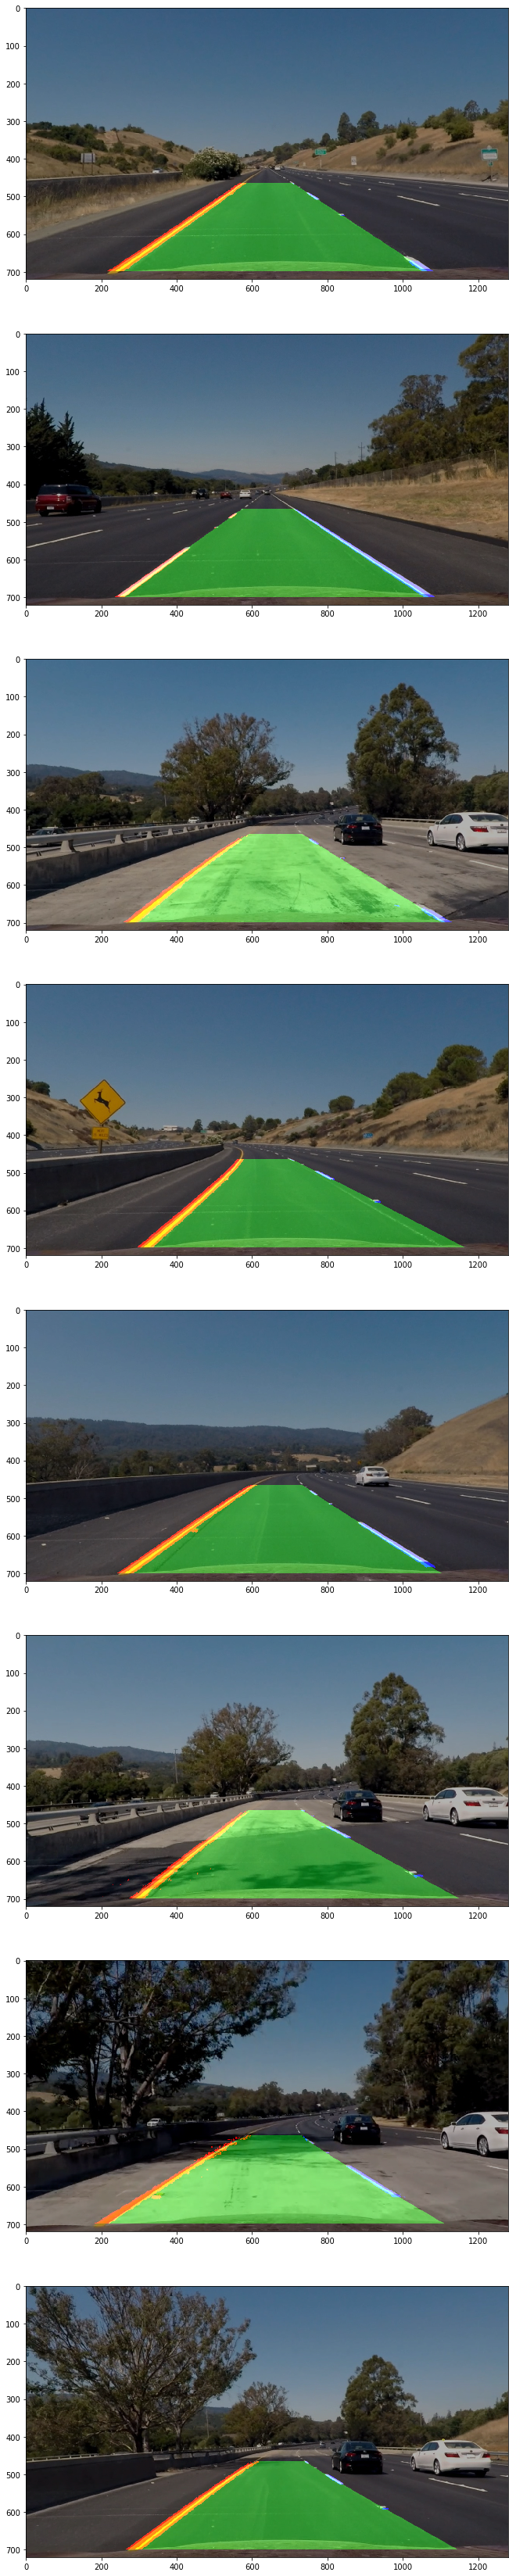

In [75]:
reload(img_manip)
test_images = os.listdir('test_images/')
num = len(test_images)

plt.figure(figsize=(20,60))
for idx, fname in enumerate(test_images):
    image = cv2.imread('test_images/'+ fname)
    out_image = process_image(image,mtx,dist)
    
    plt.subplot(num,1,idx+1)
    plt.imshow(out_image)
plt.show()

In [78]:
output = 'test_videos_output/project_video.mp4'
clip1 = VideoFileClip("project_video.mp4")
white_clip = clip1.fl_image(lambda image: process_image(image,mtx,dist)) #NOTE: this function expects color images!!
%time white_clip.write_videofile(output, audio=False)
clip1.close()

Moviepy - Building video test_videos_output/project_video.mp4.
Moviepy - Writing video test_videos_output/project_video.mp4



Moviepy - Done !
Moviepy - video ready test_videos_output/project_video.mp4
Wall time: 3min 2s


In [79]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(output))